<a href="https://colab.research.google.com/github/Rupsha-Chatterjee/my_projects/blob/main/Handwritten_digit_recognition_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
sys.version
sys.version_info
import platform
print(platform.python_version())

3.7.13


In [2]:
import keras
import numpy as np
import pandas as pd
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K

In [3]:
np.random.seed(30)

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
print(type(x_train))

<class 'numpy.ndarray'>


In [6]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


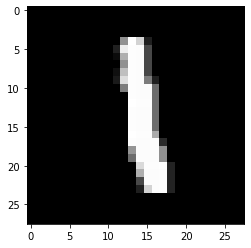

In [7]:
import matplotlib.pyplot as plt
plt.imshow(x_train[6], cmap='gray')
plt.show()

In [8]:
#modify the arrays to make it ready for modelling
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [9]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [10]:
#normalize the data
x_train = x_train/255
x_test = x_test/255

In [11]:
print(x_train.max())
print(x_train.min())

1.0
0.0


In [12]:
#lets fix the labels now
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [13]:
#convert class variable to "0" or "1" binary class
y_train = keras.utils.np_utils.to_categorical(y_train, 10)
y_test = keras.utils.np_utils.to_categorical(y_test, 10)

In [14]:
y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [15]:
model = Sequential()
model.add(Conv2D(30, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
#above is the convolution layer with 30 feature maps with 3*3 kernel
model.add(MaxPooling2D(pool_size=(2,2))) #pooling layer
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu')) #fully connected layer
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax')) #output layer

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
#fit the model
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=15, batch_size=100, verbose=2)

Epoch 1/15
600/600 - 37s - loss: 0.3225 - accuracy: 0.9026 - val_loss: 0.0943 - val_accuracy: 0.9692 - 37s/epoch - 62ms/step
Epoch 2/15
600/600 - 28s - loss: 0.1340 - accuracy: 0.9606 - val_loss: 0.0629 - val_accuracy: 0.9804 - 28s/epoch - 46ms/step
Epoch 3/15
600/600 - 29s - loss: 0.1033 - accuracy: 0.9690 - val_loss: 0.0521 - val_accuracy: 0.9831 - 29s/epoch - 48ms/step
Epoch 4/15
600/600 - 28s - loss: 0.0843 - accuracy: 0.9740 - val_loss: 0.0470 - val_accuracy: 0.9846 - 28s/epoch - 47ms/step
Epoch 5/15
600/600 - 28s - loss: 0.0752 - accuracy: 0.9773 - val_loss: 0.0412 - val_accuracy: 0.9866 - 28s/epoch - 46ms/step
Epoch 6/15
600/600 - 28s - loss: 0.0670 - accuracy: 0.9792 - val_loss: 0.0395 - val_accuracy: 0.9864 - 28s/epoch - 46ms/step
Epoch 7/15
600/600 - 29s - loss: 0.0598 - accuracy: 0.9817 - val_loss: 0.0394 - val_accuracy: 0.9863 - 29s/epoch - 48ms/step
Epoch 8/15
600/600 - 28s - loss: 0.0553 - accuracy: 0.9820 - val_loss: 0.0388 - val_accuracy: 0.9857 - 28s/epoch - 46ms/step


In [17]:
#final evaluation of the model
Accuracy = model.evaluate(x_test, y_test, verbose=0)
print("CNN Accuracy")
round(Accuracy[1]*100,2) 

CNN Accuracy


98.91